In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style("whitegrid")
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./titanic"]).decode("utf8"))

test.csv
train.csv



In [53]:
train = pd.read_csv('./titanic/train.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


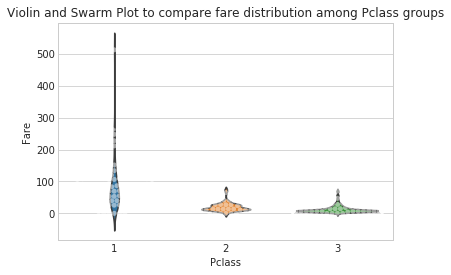

In [54]:
sns.violinplot(x='Pclass',y='Fare',data=train,inner=None)
sns.swarmplot(x='Pclass',y='Fare',data=train,color='w',alpha=0.5)
plt.title("Violin and Swarm Plot to compare fare distribution among Pclass groups")

In [55]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

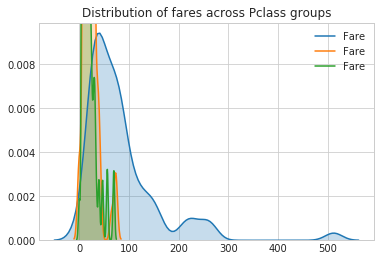

In [56]:
sns.kdeplot(train['Fare'][train['Pclass']==1],shade=True)
sns.kdeplot(train['Fare'][train['Pclass']==2],shade=True)
sns.kdeplot(train['Fare'][train['Pclass']==3],shade=True)
plt.title("Distribution of fares across Pclass groups")

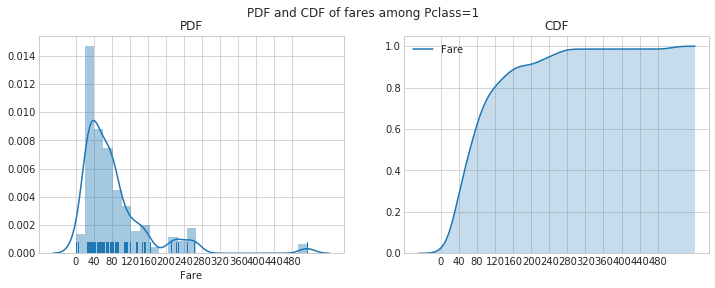

In [57]:
# Create distribution plot again for pclass=1, because the scale is hard to read in previous one
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(12,4))
fig.suptitle("PDF and CDF of fares among Pclass=1")
sns.distplot(train['Fare'][train['Pclass']==1],rug=True,ax=axis1)
axis1.set_title("PDF")
sns.kdeplot(train['Fare'][train['Pclass']==1],shade=True,cumulative=True,ax=axis2)
axis2.set_title("CDF")
x_forplot = train['Fare'][train['Pclass']==1]
axis2 = plt.xticks(np.arange(min(x_forplot),max(x_forplot)+1,40.0))

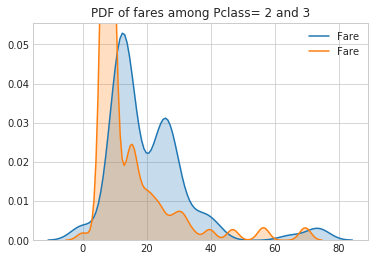

In [58]:
sns.kdeplot(train['Fare'][train['Pclass']==2],shade=True)
sns.kdeplot(train['Fare'][train['Pclass']==3],shade=True)
plt.title("PDF of fares among Pclass= 2 and 3")

In [59]:
# Create the 2 new segmentation columns
train['PaxclassA'] = train['Pclass']
train.loc[(train['PaxclassA'] == 1) & (train['Fare']>100),'PaxclassA'] = 0
train['PaxclassB'] = train['Pclass']
train.loc[(train['Fare']>60),'PaxclassB'] = 0

In [60]:
# Group fare into bins to analyze survival rate across brackets. The brackets are informed by the dist plot above
bins = [0,20,40,60,80,100,200,400,800]
train['Fare_Groups'] = pd.cut(train['Fare'],bins)

In [61]:
train['Fare_Groups'].head()

0     (0, 20]
1    (60, 80]
2     (0, 20]
3    (40, 60]
4     (0, 20]
Name: Fare_Groups, dtype: category
Categories (8, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100] < (100, 200] < (200, 400] < (400, 800]]

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxclassA,PaxclassB,Fare_Groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,3,"(0, 20]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(60, 80]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,3,"(0, 20]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,"(40, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,3,"(0, 20]"


In [63]:
train.loc[train['PaxclassA'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxclassA,PaxclassB,Fare_Groups
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,0,0,"(200, 400]"
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,0,"(100, 200]"
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,0,0,"(200, 400]"
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,0,0,"(200, 400]"
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,0,0,"(100, 200]"
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C,0,0,"(100, 200]"
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C,0,0,"(400, 800]"
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S,0,0,"(100, 200]"
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,0,0,"(100, 200]"
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0,0,"(100, 200]"


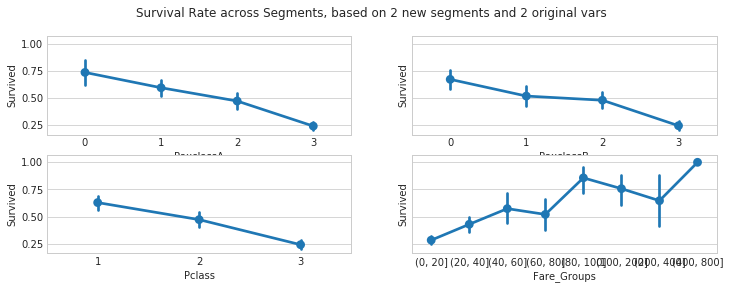

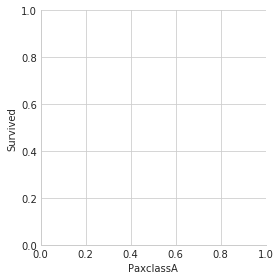

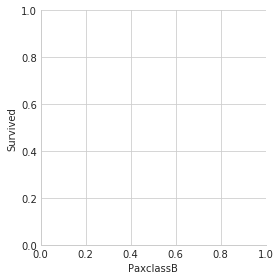

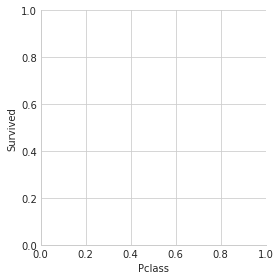

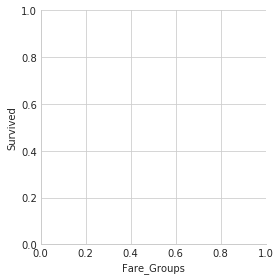

In [64]:
# Create plots to compare survival between the 2 new segmentation columns. We also show similar plot based on original Pclass and Fare buckets
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,figsize=(12,4))
#plt.clf()
sns.factorplot("PaxclassA","Survived",data=train,ax=ax1)
sns.factorplot("PaxclassB","Survived",data=train,ax=ax2)
sns.factorplot("Pclass","Survived",data=train,ax=ax3)
sns.factorplot("Fare_Groups","Survived",data=train,ax=ax4)
fig.suptitle("Survival Rate across Segments, based on 2 new segments and 2 original vars")
#plt.show()
# Note: I still don't know why these line of codes produce the blank charts on the bottom....

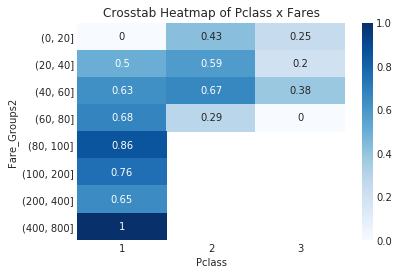

In [65]:
train['Fare_Groups2'] = train['Fare_Groups'].astype("object") # Need this conversion for heatmap to work
sns.heatmap(pd.crosstab(train['Pclass'],train['Fare_Groups2'],values=train['Survived'],aggfunc=np.mean).T,annot=True,cmap="Blues")
plt.title("Crosstab Heatmap of Pclass x Fares")

# Ideally, I should add 1 more heatmap to show the count. But let me put it in backburner, as the count is quite large for the regular pclass=1

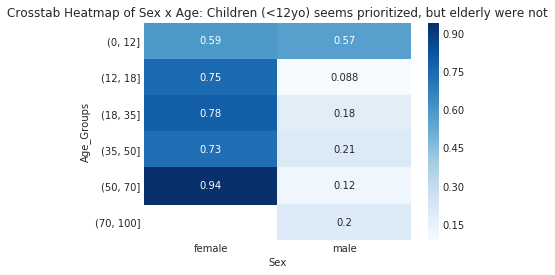

In [66]:
# Analyzing cross-tab of age and sex on survival
bins = [0,12,18,35,50,70,100]  # General age group breakdown
train['Age_Groups'] = pd.cut(train['Age'],bins)
sns.heatmap(pd.crosstab(train['Sex'],train['Age_Groups'],values=train['Survived'],aggfunc=np.mean).T,annot=True,cmap="Blues")
plt.title("Crosstab Heatmap of Sex x Age: Children (<12yo) seems prioritized, but elderly were not")

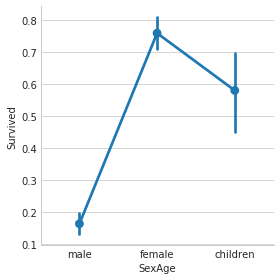

In [67]:
# Create combined variable and show the survival rate
train['SexAge'] = train['Sex']
train.loc[(train['Age']<=12),'SexAge'] = 'children'
sns.factorplot("SexAge","Survived",data=train)

Parch       0   1   2  3  4  5  6
SexAge                           
children    3  35  31  0  0  0  0
female    193  45  33  4  2  4  1
male      482  38  16  1  2  1  0


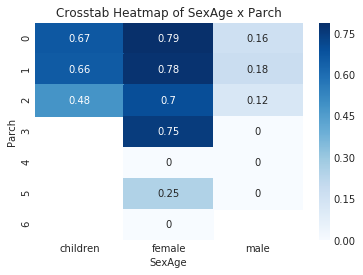

In [68]:
# Crosstab and heatmap on the impact of having parents / children
print(pd.crosstab(train['SexAge'],train['Parch']))
crosstab1 = pd.crosstab(train['SexAge'],train['Parch'],values=train['Survived'],aggfunc=np.mean)
sns.heatmap(crosstab1.T,annot=True,cmap="Blues")
plt.title("Crosstab Heatmap of SexAge x Parch")

SibSp       0   1   2  3   4  5  8
SexAge                            
children   17  21   6  7  15  3  0
female    164  98   8  7   1  1  3
male      427  90  14  2   2  1  4


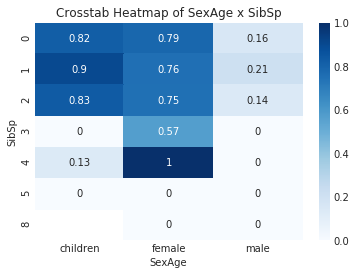

In [69]:
print(pd.crosstab(train['SexAge'],train['SibSp']))
crosstab1 = pd.crosstab(train['SexAge'],train['SibSp'],values=train['Survived'],aggfunc=np.mean)
sns.heatmap(crosstab1.T,annot=True,cmap="Blues")
plt.title("Crosstab Heatmap of SexAge x SibSp")

In [70]:
# We need to convert categorical variables into binary variable
train['Female'] = 0
train.loc[(train['SexAge']=="female"),'Female'] = 1
train['Children'] = 0
train.loc[(train['SexAge']=="children"),'Children'] = 1
train['Class1_Premium'] = 0
train.loc[(train['PaxclassA']==0),'Class1_Premium'] = 1
train['Class1'] = 0
train.loc[(train['PaxclassA']==1),'Class1'] = 1
train['Class2'] = 0
train.loc[(train['PaxclassA']==2),'Class2'] = 1

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,PaxclassB,Fare_Groups,Fare_Groups2,Age_Groups,SexAge,Female,Children,Class1_Premium,Class1,Class2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,3,"(0, 20]","(0, 20]","(18, 35]",male,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,"(60, 80]","(60, 80]","(35, 50]",female,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,3,"(0, 20]","(0, 20]","(18, 35]",female,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,"(40, 60]","(40, 60]","(18, 35]",female,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,3,"(0, 20]","(0, 20]","(18, 35]",male,0,0,0,0,0


In [72]:
# Define the variables for training
from sklearn import tree
Xtrain = train[['Female','Children','Parch','SibSp','Class1_Premium','Class1','Class2']]
Ytrain = train['Survived']

In [73]:
# Set up and fit the decision tree model. Then export as graphviz
Tree1 = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=50,random_state=1)
Tree1.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [74]:
Tree1_dot = tree.export_graphviz(Tree1,out_file=None,feature_names=Xtrain.columns,class_names=['Not Survived','Survived'],proportion=True,filled=True)
print(Tree1_dot)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Female <= 0.5\ngini = 0.473\nsamples = 100.0%\nvalue = [0.616, 0.384]\nclass = Not Survived", fillcolor="#e5813960"] ;
1 [label="Children <= 0.5\ngini = 0.332\nsamples = 68.4%\nvalue = [0.79, 0.21]\nclass = Not Survived", fillcolor="#e58139bb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Class1 <= 0.5\ngini = 0.273\nsamples = 60.6%\nvalue = [0.837, 0.163]\nclass = Not Survived", fillcolor="#e58139cd"] ;
1 -> 2 ;
3 [label="Class1_Premium <= 0.5\ngini = 0.206\nsamples = 49.2%\nvalue = [0.884, 0.116]\nclass = Not Survived", fillcolor="#e58139dd"] ;
2 -> 3 ;
4 [label="gini = 0.195\nsamples = 47.3%\nvalue = [0.891, 0.109]\nclass = Not Survived", fillcolor="#e58139e0"] ;
3 -> 4 ;
5 [label="gini = 0.415\nsamples = 1.9%\nvalue = [0.706, 0.294]\nclass = Not Survived", fillcolor="#e5813995"] ;
3 -> 5 ;
6 [label="SibSp <= 0.5\ngini = 0.462\nsamples = 11.4%\nvalue = [0.637, 0.363]\nclass = Not 

In [75]:
# http://www.webgraphviz.com/  < the print(Tree1_dot)

In [76]:
# Check the score of prediction accuracy
Tree1.score(Xtrain,Ytrain)

0.81593714927048255

In [100]:
Ytrain.dtype

dtype('int64')

In [77]:
test = pd.read_csv('./titanic/test.csv')

# Create new combined variables
test['SexAge'] = test['Sex']
test.loc[(test['Age']<=12),'SexAge'] = 'children'
test['PaxclassA'] = test['Pclass']
test.loc[(test['PaxclassA'] == 1) & (test['Fare']>100),'PaxclassA'] = 0

# Create binary variables out of categorical variables
test['Female'] = 0
test.loc[(test['SexAge']=="female"),'Female'] = 1
test['Children'] = 0
test.loc[(test['SexAge']=="children"),'Children'] = 1
test['Class1_Premium'] = 0
test.loc[(test['PaxclassA']==0),'Class1_Premium'] = 1
test['Class1'] = 0
test.loc[(test['PaxclassA']==1),'Class1'] = 1
test['Class2'] = 0
test.loc[(test['PaxclassA']==2),'Class2'] = 1

# Create the prediction
Xtest = test[['Female','Children','Parch','SibSp','Class1_Premium','Class1','Class2']]
Ytest_pred = Tree1.predict(Xtest)

In [78]:
Ytest_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [79]:
submission = pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived":Ytest_pred
})
submission.to_csv('titanic.csv',index=False)

In [80]:
Ytest_pred.sum()

161

In [81]:
print(check_output(["ls", "."]).decode("utf8"))

breast_cancer_data.csv
Breast_Cancer.ipynb
Compare_Classifier.ipynb
titanic
titanic2.csv
titanic.csv
Titanic.ipynb



In [82]:
# Set up and fit the decision tree model. Then export as graphviz
Tree2 = tree.DecisionTreeClassifier(max_depth=6,min_samples_split=50,random_state=1,min_impurity_decrease=0.0003)
Tree2.fit(Xtrain,Ytrain)
Tree2_dot = tree.export_graphviz(Tree1,out_file=None,feature_names=Xtrain.columns,class_names=['Not Survived','Survived'],proportion=True,filled=True)
print(Tree2_dot)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Female <= 0.5\ngini = 0.473\nsamples = 100.0%\nvalue = [0.616, 0.384]\nclass = Not Survived", fillcolor="#e5813960"] ;
1 [label="Children <= 0.5\ngini = 0.332\nsamples = 68.4%\nvalue = [0.79, 0.21]\nclass = Not Survived", fillcolor="#e58139bb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Class1 <= 0.5\ngini = 0.273\nsamples = 60.6%\nvalue = [0.837, 0.163]\nclass = Not Survived", fillcolor="#e58139cd"] ;
1 -> 2 ;
3 [label="Class1_Premium <= 0.5\ngini = 0.206\nsamples = 49.2%\nvalue = [0.884, 0.116]\nclass = Not Survived", fillcolor="#e58139dd"] ;
2 -> 3 ;
4 [label="gini = 0.195\nsamples = 47.3%\nvalue = [0.891, 0.109]\nclass = Not Survived", fillcolor="#e58139e0"] ;
3 -> 4 ;
5 [label="gini = 0.415\nsamples = 1.9%\nvalue = [0.706, 0.294]\nclass = Not Survived", fillcolor="#e5813995"] ;
3 -> 5 ;
6 [label="SibSp <= 0.5\ngini = 0.462\nsamples = 11.4%\nvalue = [0.637, 0.363]\nclass = Not 

In [83]:
# Create the prediction
Xtest = test[['Female','Children','Parch','SibSp','Class1_Premium','Class1','Class2']]
Ytest_pred = Tree2.predict(Xtest)

submission = pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived":Ytest_pred
})
submission.to_csv('titanic2.csv',index=False)

In [84]:
Ytest_pred.sum()

146

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1500, criterion='gini')

rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
Ytest_pred2 = rfc.predict(Xtest)

In [96]:
Ytest_pred2.sum()

162

In [98]:
submission = pd.DataFrame({
    "PassengerId":test['PassengerId'],
    "Survived":Ytest_pred
})
submission.to_csv('rf_titanic.csv',index=False)